<a href="https://colab.research.google.com/github/vanshika2424/Autismpredictionml/blob/main/Autism_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import os
import seaborn
import matplotlib.pyplot as plt


In [56]:
train_file='/content/train (1).csv'

df_train = pd.read_csv(train_file)


In [57]:
df_train


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


In [58]:
df_train['ethnicity'].value_counts()

,count
ethnicity,
White-European,257
?,203
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


In [59]:
df_train['relation'].value_counts()

,count
relation,
Self,709
?,40
Parent,29
Relative,18
Others,2
Health care professional,2


In [60]:
df_train = df_train.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

<ipython-input-60-810e5f5d6bca>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


In [61]:
df_train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,Others,0,0,Austria,0,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,Others,0,0,India,0,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,0,1,United States,0,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,Others,0,0,United States,0,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,Others,0,0,South Africa,0,-4.777286,18 and more,Self,0


In [62]:
df_train['ethnicity'].value_counts()

,count
ethnicity,
White-European,257
Others,235
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Latino,17
Hispanic,9


In [63]:
df_train['relation'].value_counts()

,count
relation,
Self,709
Others,42
Parent,29
Relative,18
Health care professional,2


In [64]:
df_train.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [65]:
df_train=df_train.drop(['ID'],axis=1)

In [66]:
df_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,...,f,Others,0,0,Austria,0,6.351166,18 and more,Self,0
1,0,0,0,0,0,0,0,0,0,0,...,m,Others,0,0,India,0,2.255185,18 and more,Self,0
2,1,1,1,1,1,1,1,1,1,1,...,m,White-European,0,1,United States,0,14.851484,18 and more,Self,1
3,0,0,0,0,0,0,0,0,0,0,...,f,Others,0,0,United States,0,2.276617,18 and more,Self,0
4,0,0,0,0,0,0,0,0,0,0,...,m,Others,0,0,South Africa,0,-4.777286,18 and more,Self,0


<Axes: xlabel='gender', ylabel='count'>

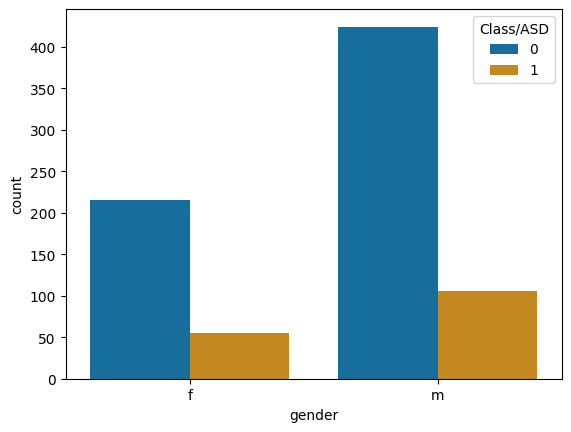

In [67]:
seaborn.countplot(x='gender',hue='Class/ASD',data=df_train,palette='colorblind')

In [68]:
df_train['gender'].value_counts()

,count
gender,
m,530
f,270


<Axes: xlabel='age_desc', ylabel='count'>

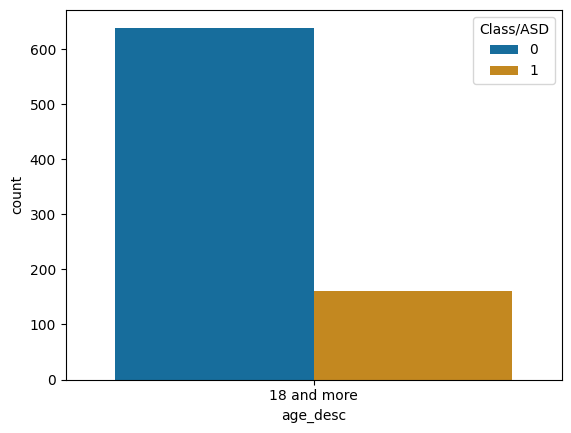

In [69]:
seaborn.countplot(x='age_desc',hue='Class/ASD',data=df_train,palette='colorblind')

<Axes: xlabel='austim', ylabel='count'>

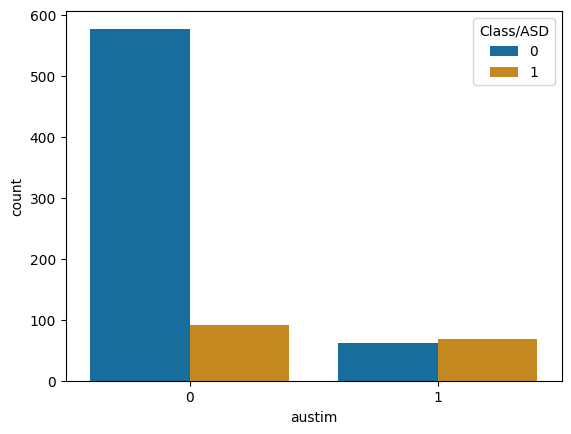

In [70]:
seaborn.countplot(x='austim',hue='Class/ASD',data=df_train,palette='colorblind')

<Axes: xlabel='jaundice', ylabel='count'>

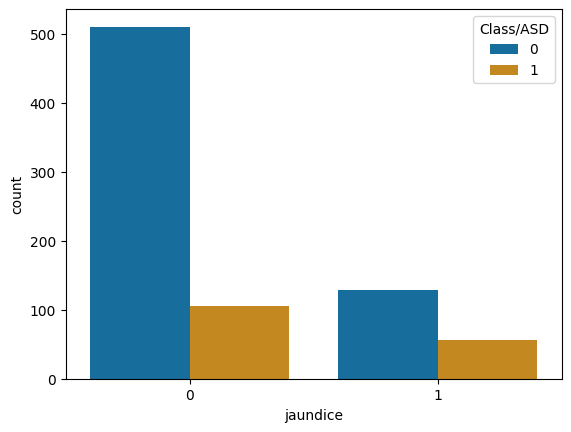

In [71]:
seaborn.countplot(x='jaundice',hue='Class/ASD',data=df_train,palette='colorblind')

<Axes: xlabel='contry_of_res', ylabel='count'>

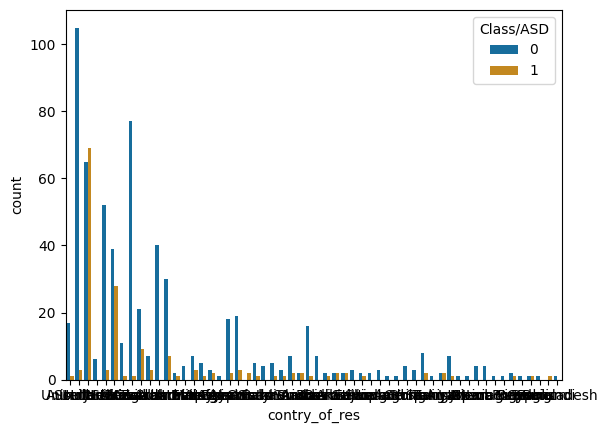

In [72]:
seaborn.countplot(x='contry_of_res',hue='Class/ASD',data=df_train,palette='colorblind')

In [73]:
country_scores = df_train.pivot_table(index='contry_of_res',columns='Class/ASD',values ='gender',aggfunc='count',
                        fill_value=0).reset_index()
country_order = country_scores.sort_values(by=1,ascending=False).contry_of_res
country_order

,contry_of_res
54,United States
53,United Kingdom
15,Canada
6,Australia
0,Afghanistan
32,Kazakhstan
31,Jordan
25,India
21,France
47,Spain


In [74]:
country_order = df_train['contry_of_res'].unique()

<Axes: xlabel='count', ylabel='contry_of_res'>

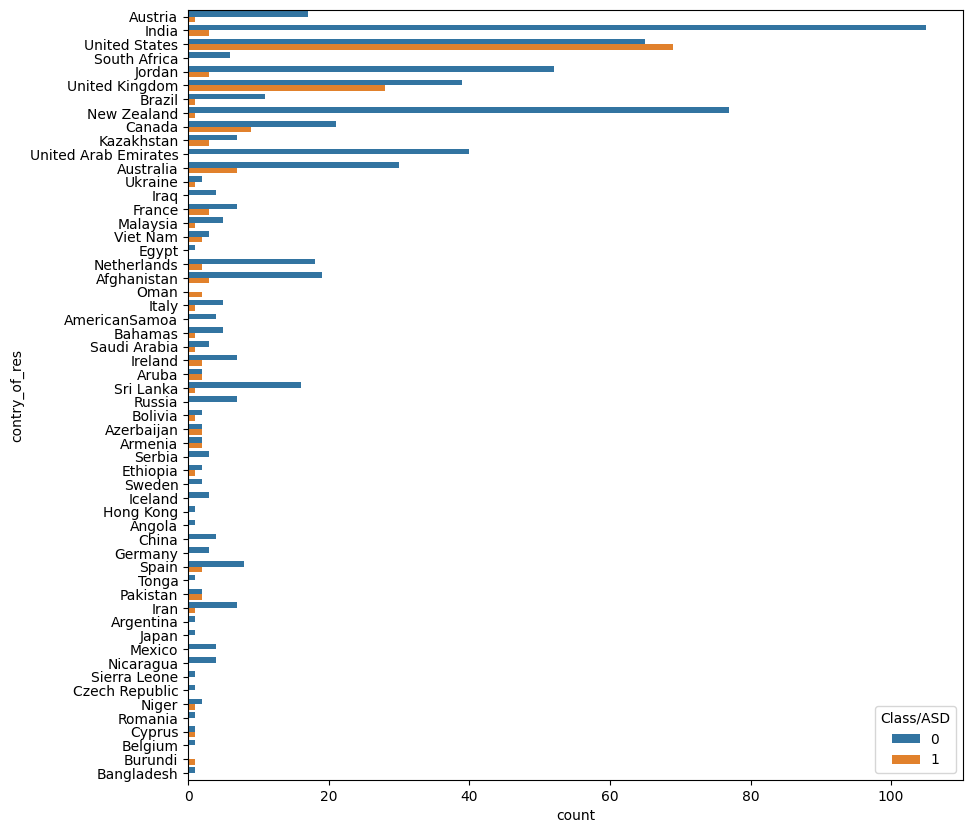

In [75]:
plt.figure(figsize=(10,10))
seaborn.countplot(y = 'contry_of_res',hue='Class/ASD', data = df_train,order=country_order)

<Axes: xlabel='used_app_before', ylabel='count'>

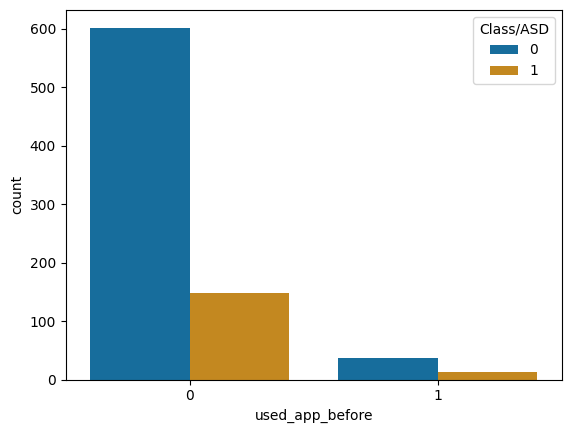

In [76]:
seaborn.countplot(x='used_app_before',hue='Class/ASD',data=df_train,palette='colorblind')

<Axes: xlabel='relation', ylabel='count'>

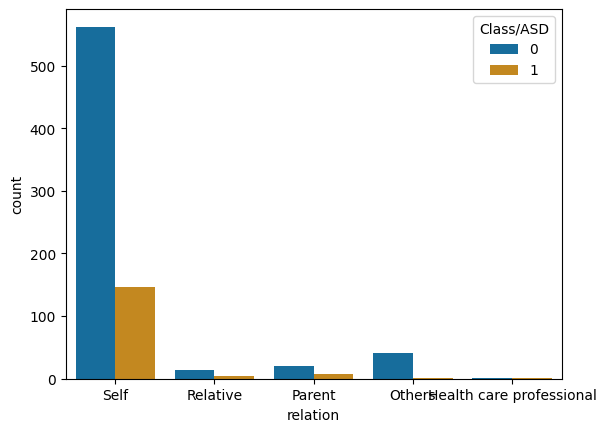

In [77]:
seaborn.countplot(x='relation',hue='Class/ASD',data=df_train,palette='colorblind')

<Axes: xlabel='age', ylabel='count'>

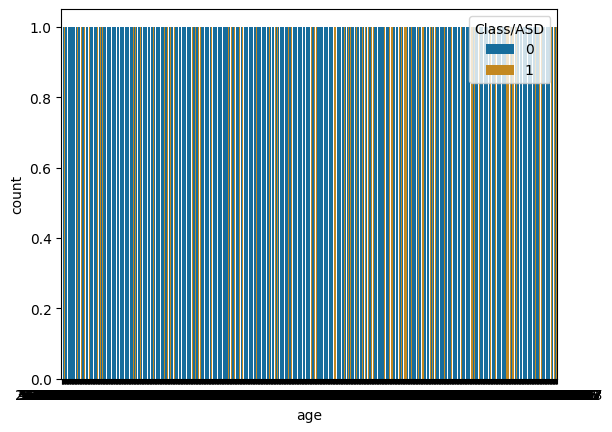

In [78]:
seaborn.countplot(x='age',hue='Class/ASD',data=df_train,palette='colorblind')

Text(0.5, 0, 'Age (years)')

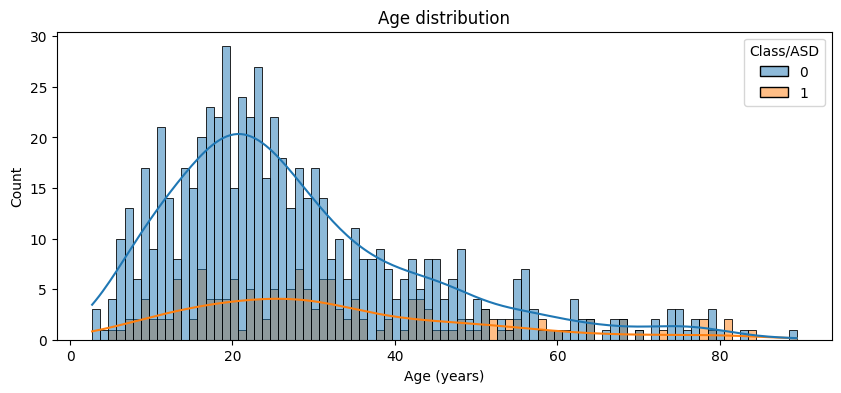

In [28]:
plt.figure(figsize=(10,4))


seaborn.histplot(data=df_train, x='age', hue='Class/ASD', binwidth=1, kde=True)


plt.title('Age distribution')
plt.xlabel('Age (years)')

<Axes: xlabel='result', ylabel='Count'>

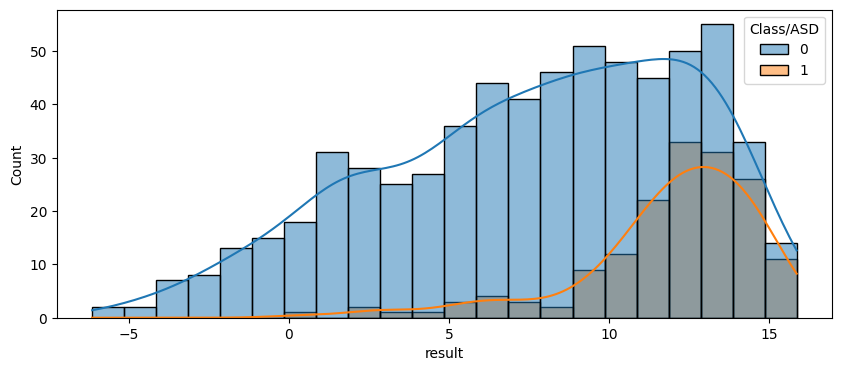

In [106]:
plt.figure(figsize=(10,4))
seaborn.histplot(data=df_train, x='result', hue='Class/ASD', binwidth=1, kde=True)

In [79]:
df=df_train.drop(['age_desc'],axis=1)

In [80]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Others,0,0,Austria,0,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,Others,0,0,India,0,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,0,1,United States,0,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,Others,0,0,United States,0,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,Others,0,0,South Africa,0,-4.777286,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,0,0,New Zealand,0,12.999501,Self,0
796,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,0,0,Cyprus,0,13.561518,Self,0
797,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,1,0,New Zealand,0,2.653177,Self,0
798,0,0,0,0,0,0,0,0,0,0,16.414305,f,Others,0,0,Canada,0,9.069342,Self,0


In [81]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [82]:
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])
    df

<ipython-input-82-3a7fdf5a99e1>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-82-3a7fdf5a99e1>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-82-3a7fdf5a99e1>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-82-3a7fdf5a99e1>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-82-3a7fdf5a99e1>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. Th

In [83]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,7,0,6.351166,4,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,25,0,2.255185,4,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,54,0,14.851484,4,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,54,0,2.276617,4,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,46,0,-4.777286,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,16.597187,1,2,0,0,36,0,12.999501,4,0
796,0,1,1,0,0,1,0,1,1,1,20.703001,1,9,0,0,17,0,13.561518,4,0
797,0,0,0,0,0,0,0,0,0,0,5.711481,1,7,1,0,36,0,2.653177,4,0
798,0,0,0,0,0,0,0,0,0,0,16.414305,0,5,0,0,15,0,9.069342,4,0


In [84]:
removal = [ 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

In [85]:
target

,Class/ASD
0,0
1,0
2,1
3,0
4,0
...,...
795,0
796,0
797,0
798,0


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from imblearn.over_sampling import RandomOverSampler


X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)


ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape

((1028, 17), (1028,))

In [87]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [88]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [89]:
lr=LogisticRegression()
lr.fit(X,Y)

LogisticRegression()

In [90]:
X_val

array([[-1.40090543, -1.41318242, -1.28965594, ..., -0.55162097,
        -2.81637671,  0.3120428 ],
       [ 0.71382406,  0.70762273, -1.28965594, ..., -0.32587799,
         1.20737542,  0.3120428 ],
       [ 0.71382406,  0.70762273,  0.77540061, ...,  0.97214412,
         0.92498124,  0.3120428 ],
       ...,
       [-1.40090543,  0.70762273, -1.28965594, ..., -0.04369927,
         0.94585175,  0.3120428 ],
       [-1.40090543, -1.41318242, -1.28965594, ..., -0.04369927,
        -3.31312585,  0.3120428 ],
       [ 0.71382406,  0.70762273,  0.77540061, ..., -0.66449245,
         0.77516708,  0.3120428 ]])

In [91]:
Y_val

,Class/ASD
27,0
334,0
730,1
392,0
495,0
...,...
564,1
588,0
157,0
370,0


In [92]:
predict=lr.predict(X_val)

In [93]:
predict


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1])

In [94]:
from sklearn.metrics import accuracy_score, classification_report


accuracy = accuracy_score(Y_val, predict)
print("Accuracy on Validation Set:", accuracy)

Accuracy on Validation Set: 0.8125


In [95]:
score = lr.score(X_val, Y_val)
print("Validation Score:", score)

Validation Score: 0.8125


In [96]:

print("Training Score:", lr.score(X,Y))

Training Score: 0.8599221789883269


In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(X,Y)

RandomForestClassifier(n_estimators=1000)

In [98]:
rfc.score(X,Y)

1.0

In [99]:
rfc.score(X_val,Y_val)
print("Validation Score of RandomForestClassifier:", score)


Validation Score of RandomForestClassifier: 0.8125


In [100]:
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
models = [LogisticRegression(), RandomForestClassifier(),XGBClassifier(),SVC(kernel='rbf')]

for model in models:
  model.fit(X, Y)

  print(f'{model} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()

LogisticRegression() : 
Training Accuracy :  0.8599221789883267
Validation Accuracy :  0.8182857142857144

RandomForestClassifier() : 
Training Accuracy :  1.0
Validation Accuracy :  0.7662857142857142

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation 

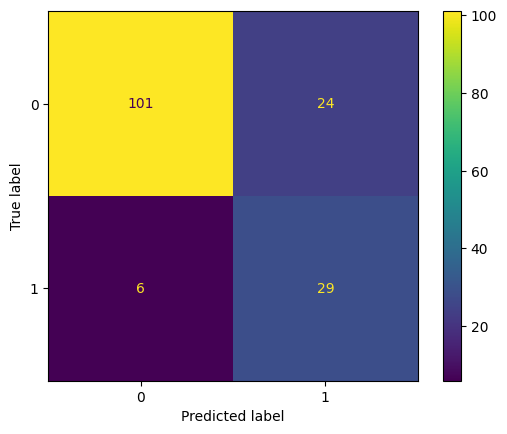

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
plt.show()


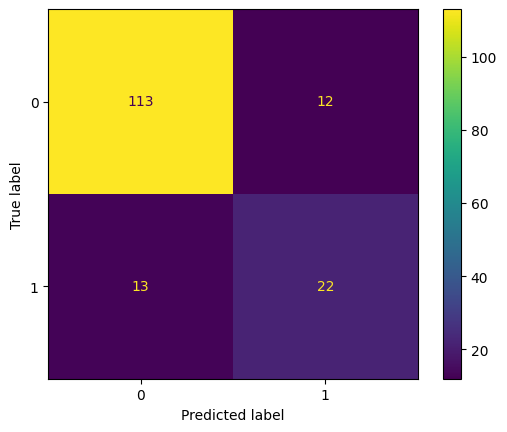

In [102]:
ConfusionMatrixDisplay.from_estimator(models[1], X_val, Y_val)
plt.show()

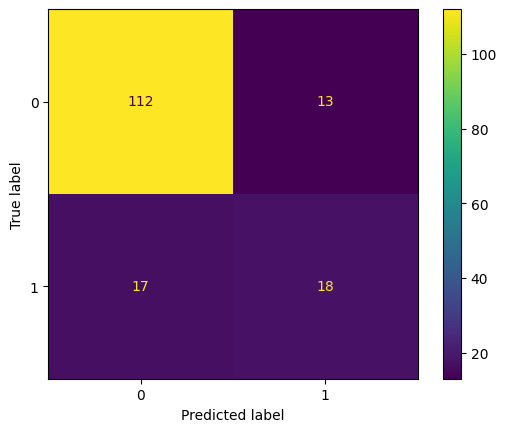

In [103]:
ConfusionMatrixDisplay.from_estimator(models[2], X_val, Y_val)
plt.show()

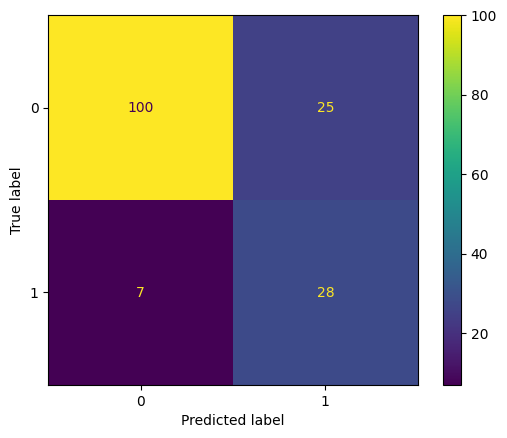

In [104]:
ConfusionMatrixDisplay.from_estimator(models[3], X_val, Y_val)
plt.show()